## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import re
import math

import os

import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## I. Data Sourcing & Data Cleaning

In [5]:
app_df = pd.read_csv(r'C:\Users\sashi\OneDrive\Desktop\Credit EDA\application_data.csv')

#pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_columns', None)


app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
#We see that the columns DAYS_BIRTH & DAYS_EMPLOYED has negative values. It may have positive values as well.
#Lets take the absolute value to deal with both.

app_df['DAYS_BIRTH'] = abs(app_df['DAYS_BIRTH'])
app_df['DAYS_EMPLOYED'] = abs(app_df['DAYS_EMPLOYED'])

app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [7]:
app_df.shape


(307511, 122)

In [8]:
# Dropping all columns with only null values
app_df=app_df.dropna(axis=1,how='all')
app_df.shape

(307511, 122)

There is no column with only null values.

In [9]:
#Calculate percentage of missing value in each column

round(app_df.isnull().sum()/len(app_df)*100,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [10]:
# Dropping columns with more than 47% null values since that wont contribute to the data analysis
app_df=app_df.loc[:,round(app_df.isnull().sum()/len(app_df)*100,2)<47]
app_df.shape

(307511, 73)

In [11]:
round(app_df.isnull().sum()/len(app_df)*100,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

#### From the above list we can see that the columns which are having null values and could be imputed are, 
               
1. OCCUPATION_TYPE    
2. OBS_30_CNT_SOCIAL_CIRCLE        
3. DEF_30_CNT_SOCIAL_CIRCLE        
4. OBS_60_CNT_SOCIAL_CIRCLE        
5. DEF_60_CNT_SOCIAL_CIRCLE 
6. AMT_REQ_CREDIT_BUREAU_HOUR     
7. AMT_REQ_CREDIT_BUREAU_DAY      
8. AMT_REQ_CREDIT_BUREAU_WEEK     
9. AMT_REQ_CREDIT_BUREAU_MON      
10. AMT_REQ_CREDIT_BUREAU_QRT      
11. AMT_REQ_CREDIT_BUREAU_YEAR     

Other columns having nul values can be ignored since they do not have any impact on the analysis we are going to make.



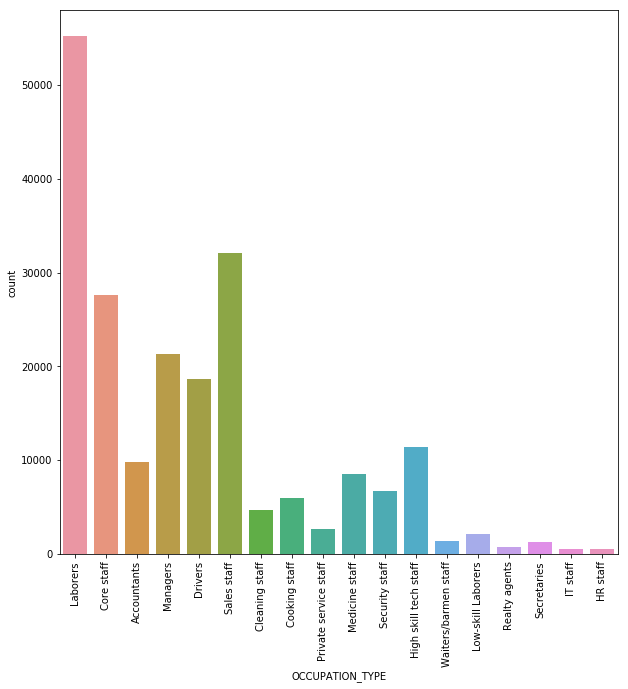

In [12]:
#Plotting a count plot of occupation type so that the Null values can be replaced.
plt.figure(figsize=(10,10))
sns.countplot(x="OCCUPATION_TYPE", data=app_df)
plt.xticks(rotation =90)
plt.show()

We can see that the most common occupation type is 'Laborers'. We can impute the missing values in the 'OCCUPATION_TYPE' field with Laborers.

In [13]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


For the below columns the null values can be replaced by the median value since we are looking for no. of DPD values and no. of Defaulted people in the clients social surroundings.

1. OBS_30_CNT_SOCIAL_CIRCLE
2. DEF_30_CNT_SOCIAL_CIRCLE
3. OBS_60_CNT_SOCIAL_CIRCLE
4. DEF_60_CNT_SOCIAL_CIRCLE


For the below columns the null values can be replaced by the Mode value of the column since we are looking for no. of enquiries to the credit bureau and the Mode value will be the best choice for imputing.

1. AMT_REQ_CREDIT_BUREAU_HOUR
2. AMT_REQ_CREDIT_BUREAU_DAY
3. AMT_REQ_CREDIT_BUREAU_WEEK
4. AMT_REQ_CREDIT_BUREAU_MON
5. AMT_REQ_CREDIT_BUREAU_QRT
6. AMT_REQ_CREDIT_BUREAU_YEAR

### Selecting Columns from the dataframe for our analysis.

Now we will select columns from the dataframe which will be used for further analysis. We will look at each column of the dataframe and their descriprition from the available data dictionary. Then will decide which columns could be a factor deciding the applicant credit worthy or not. 

We have selected the following columns for our analysis.

1. TARGET
2. NAME_CONTRACT_TYPE
3. CODE_GENDER
4. FLAG_OWN_CAR
5. FLAG_OWN_REALTY
6. CNT_CHILDREN
7. AMT_INCOME_TOTAL
8. AMT_CREDIT
9. AMT_ANNUITY
10. AMT_GOODS_PRICE
11. NAME_INCOME_TYPE
12. NAME_EDUCATION_TYPE
13. NAME_FAMILY_STATUS
14. NAME_HOUSING_TYPE
15. DAYS_BIRTH
16. DAYS_EMPLOYED
17. FLAG_WORK_PHONE
18. OCCUPATION_TYPE
19. CNT_FAM_MEMBERS
20. ORGANIZATION_TYPE
21. DEF_30_CNT_SOCIAL_CIRCLE
22. DEF_60_CNT_SOCIAL_CIRCLE

In [14]:
#We are keeping only the columns we need for the analysis in the dataframe.

app_df1 = app_df[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR',
                 'FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                 'AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                 'DAYS_BIRTH','DAYS_EMPLOYED','FLAG_WORK_PHONE','CNT_FAM_MEMBERS','OCCUPATION_TYPE',
                 'ORGANIZATION_TYPE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']]
app_df1.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,OCCUPATION_TYPE,ORGANIZATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,0,1.0,Laborers,Business Entity Type 3,2.0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765,1188,0,2.0,Core staff,School,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,1,1.0,Laborers,Government,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,0,2.0,Laborers,Business Entity Type 3,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,0,1.0,Core staff,Religion,0.0,0.0


In [15]:
Gender_df = app_df1.loc[~app_df['CODE_GENDER'].isin(['M','F'])]

Gender_df

#df.loc[~df['column_name'].isin(some_values)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,OCCUPATION_TYPE,ORGANIZATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,337500.0,Working,Secondary / secondary special,Married,Municipal apartment,20232,10044,1,2.0,NaN,Business Entity Type 1,0.0,0.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,225000.0,Working,Secondary / secondary special,Married,House / apartment,13717,2797,1,4.0,Low-skill Laborers,Industry: type 3,0.0,0.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,225000.0,Working,Higher education,Married,House / apartment,10647,1228,1,3.0,Core staff,Kindergarten,1.0,1.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,900000.0,Commercial associate,Incomplete higher,Civil marriage,House / apartment,9649,2293,1,2.0,NaN,Medicine,4.0,4.0


In [16]:
#We saw that there are invalid values in the Gender field. We should remove those.

app_df1 = app_df1.loc[app_df['CODE_GENDER'].isin(['M','F'])]



In [17]:
app_df1.loc[~app_df['CODE_GENDER'].isin(['M','F'])]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,OCCUPATION_TYPE,ORGANIZATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE


In [18]:
# Imputing Null values from CNT_FAM_MEMBERS,DEF_30_CNT_SOCIAL_CIRCLE,EF_60_CNT_SOCIAL_CIRCLE   

app_df1['CNT_FAM_MEMBERS'] = app_df1['CNT_FAM_MEMBERS'].fillna(app_df1['CNT_FAM_MEMBERS'].mode()[0])

app_df1['DEF_30_CNT_SOCIAL_CIRCLE'] = app_df1['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(app_df1['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0])

app_df1['DEF_60_CNT_SOCIAL_CIRCLE'] = app_df1['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(app_df1['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0])




As we can see above we have removed the invalid genders from the dataframe. 

In [19]:
app_df1.dtypes

SK_ID_CURR                    int64
TARGET                        int64
NAME_CONTRACT_TYPE           object
CODE_GENDER                  object
FLAG_OWN_CAR                 object
FLAG_OWN_REALTY              object
CNT_CHILDREN                  int64
AMT_INCOME_TOTAL            float64
AMT_CREDIT                  float64
AMT_ANNUITY                 float64
AMT_GOODS_PRICE             float64
NAME_INCOME_TYPE             object
NAME_EDUCATION_TYPE          object
NAME_FAMILY_STATUS           object
NAME_HOUSING_TYPE            object
DAYS_BIRTH                    int64
DAYS_EMPLOYED                 int64
FLAG_WORK_PHONE               int64
CNT_FAM_MEMBERS             float64
OCCUPATION_TYPE              object
ORGANIZATION_TYPE            object
DEF_30_CNT_SOCIAL_CIRCLE    float64
DEF_60_CNT_SOCIAL_CIRCLE    float64
dtype: object

#### The datatypes of the follwing columns must be changed to integer since they represent the count of a certain catagory. 
1. CNT_FAM_MEMBERS             
2. DEF_30_CNT_SOCIAL_CIRCLE    
2. DEF_60_CNT_SOCIAL_CIRCLE    

#### The datatype of 'TARGET ' must be changed to object since it represents two catagories of people.

In [20]:
#Changing data type of the above columns.

cols = ['CNT_FAM_MEMBERS','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
app_df1[cols] = app_df1[cols].applymap(np.int64)

app_df1['TARGET'] = app_df1['TARGET'].apply(lambda x: str(x))

app_df1.dtypes


SK_ID_CURR                    int64
TARGET                       object
NAME_CONTRACT_TYPE           object
CODE_GENDER                  object
FLAG_OWN_CAR                 object
FLAG_OWN_REALTY              object
CNT_CHILDREN                  int64
AMT_INCOME_TOTAL            float64
AMT_CREDIT                  float64
AMT_ANNUITY                 float64
AMT_GOODS_PRICE             float64
NAME_INCOME_TYPE             object
NAME_EDUCATION_TYPE          object
NAME_FAMILY_STATUS           object
NAME_HOUSING_TYPE            object
DAYS_BIRTH                    int64
DAYS_EMPLOYED                 int64
FLAG_WORK_PHONE               int64
CNT_FAM_MEMBERS               int64
OCCUPATION_TYPE              object
ORGANIZATION_TYPE            object
DEF_30_CNT_SOCIAL_CIRCLE      int64
DEF_60_CNT_SOCIAL_CIRCLE      int64
dtype: object

### Derived Metrics.

Now we will look at few columns and will try to derive a new column that will help us in our analysis.


##### 'AGE' Column
The DAYS_BIRTH column is the no. of days since the applicant's birthday and is a negative value. We will treat the column and add a new column 'AGE' which will show the age of the applicant in years.


In [21]:
app_df1['AGE'] = app_df1.DAYS_BIRTH//365
app_df1.head(50)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,OCCUPATION_TYPE,ORGANIZATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,0,1,Laborers,Business Entity Type 3,2,2,25
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765,1188,0,2,Core staff,School,0,0,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,1,1,Laborers,Government,0,0,52
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,0,2,Laborers,Business Entity Type 3,0,0,52
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,0,1,Core staff,Religion,0,0,54
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,16941,1588,1,2,Laborers,Other,0,0,46
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,Commercial associate,Higher education,Married,House / apartment,13778,3130,0,3,Accountants,Business Entity Type 3,0,0,37
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,1530000.0,State servant,Higher education,Married,House / apartment,18850,449,1,2,Managers,Other,0,0,51
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Pensioner,Secondary / secondary special,Married,House / apartment,20099,365243,0,2,NaN,XNA,0,0,55
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,405000.0,Working,Secondary / secondary special,Single / not married,House / apartment,14469,2019,0,1,Laborers,Electricity,0,0,39


##### 'YEARS_EMP'

Lets treat the DAYS_EMPLOYED column which is a negative value and convert that to years and put that into a new column.

In [22]:
app_df1['YEARS_EMP'] = app_df1.DAYS_EMPLOYED//365
app_df1.head(200)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,OCCUPATION_TYPE,ORGANIZATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE,YEARS_EMP
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,0,1,Laborers,Business Entity Type 3,2,2,25,1
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765,1188,0,2,Core staff,School,0,0,45,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,1,1,Laborers,Government,0,0,52,0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,0,2,Laborers,Business Entity Type 3,0,0,52,8
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,0,1,Core staff,Religion,0,0,54,8
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,16941,1588,1,2,Laborers,Other,0,0,46,4
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,Commercial associate,Higher education,Married,House / apartment,13778,3130,0,3,Accountants,Business Entity Type 3,0,0,37,8
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,1530000.0,State servant,Higher education,Married,House / apartment,18850,449,1,2,Managers,Other,0,0,51,1
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Pensioner,Secondary / secondary special,Married,House / apartment,20099,365243,0,2,NaN,XNA,0,0,55,1000
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,405000.0,Working,Secondary / secondary special,Single / not married,House / apartment,14469,2019,0,1,Laborers,Electricity,0,0,39,5


### Treating Outliers.

We will consider the following three columns and will try to find out the outliers.

1. YEARS_EMP
2. CNT_CHILDREN
3. CNT_FAM_MEMBERS

We will plot box plots of the above columns to find the outliers.


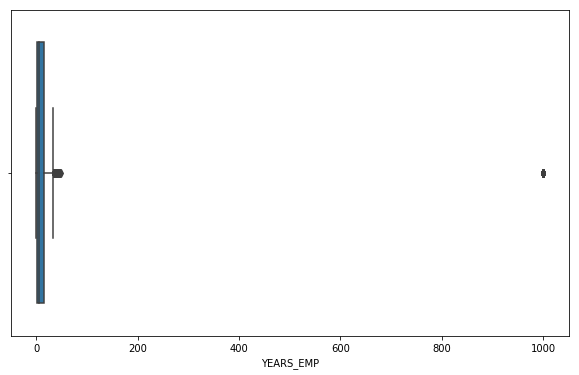

In [23]:
#Lets plot a box plot for the column YEARS_EMP
plt.figure(figsize=(10,6))

sns.boxplot(x=app_df1['YEARS_EMP'])

plt.show()

#### We could observe that the YEARS_EMP column has lot of  values around the value 1000, which are invalid. Also a person having more than 50 years of employment is very unlikely. Lets drop those rows.

In [24]:
app_df1 = app_df1.drop(app_df1[app_df1.YEARS_EMP > 50].index)

app_df1.head(100)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,OCCUPATION_TYPE,ORGANIZATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE,YEARS_EMP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,0,1,Laborers,Business Entity Type 3,2,2,25,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765,1188,0,2,Core staff,School,0,0,45,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,1,1,Laborers,Government,0,0,52,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,0,2,Laborers,Business Entity Type 3,0,0,52,8
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,0,1,Core staff,Religion,0,0,54,8
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,16941,1588,1,2,Laborers,Other,0,0,46,4
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Commercial associate,Higher education,Married,House / apartment,13778,3130,0,3,Accountants,Business Entity Type 3,0,0,37,8
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,State servant,Higher education,Married,House / apartment,18850,449,1,2,Managers,Other,0,0,51,1
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Working,Secondary / secondary special,Single / not married,House / apartment,14469,2019,0,1,Laborers,Electricity,0,0,39,5
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,652500.0,Working,Higher education,Married,House / apartment,10197,679,0,3,Core staff,Medicine,0,0,27,1


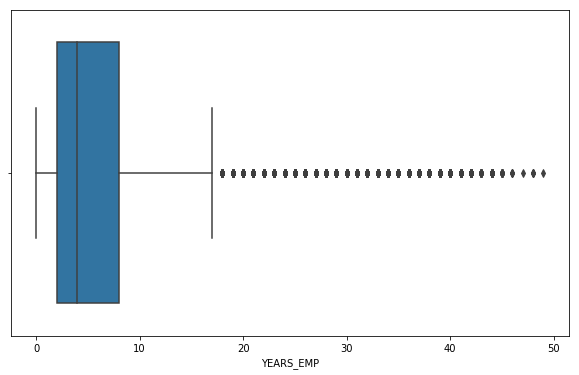

In [25]:
#Plot after removal of outliers from YEARS_EMP

plt.figure(figsize=(10,6))

sns.boxplot(x=app_df1['YEARS_EMP'])

plt.show()

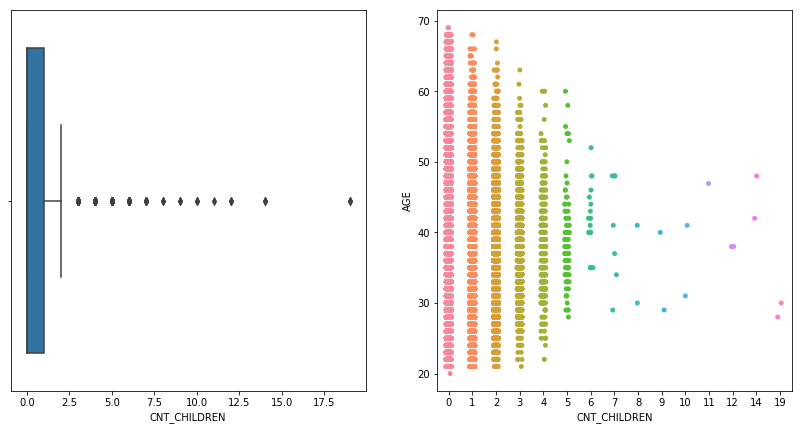

In [26]:
#Lets plot a box plot and scatter plot for the column CNT_CHILDREN
plt.figure(figsize=(14,7))

plt.subplot(121)
sns.boxplot(x=app_df1['CNT_CHILDREN'])

plt.subplot(122)
sns.stripplot(x=app_df1['CNT_CHILDREN'],y=app_df1['AGE'])


plt.show()

It is highly improbable that a person between 40 & 50 has 7 or more children. Also it is very unlikely that a person between the age 20 and 30 has more than 4 children. Lets consider both the scenarios as outliers and remove those from the dataframe.  

In [27]:
app_df2 = app_df1
app_df2 = app_df2.drop(app_df2[(app_df2['CNT_CHILDREN'] > 7)].index)
app_df2 = app_df2.drop(app_df2[(app_df2['AGE'] < 30) &(app_df2['AGE'] > 20)& (app_df2['CNT_CHILDREN'] > 4)].index)

app_df2.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,OCCUPATION_TYPE,ORGANIZATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE,YEARS_EMP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,0,1,Laborers,Business Entity Type 3,2,2,25,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765,1188,0,2,Core staff,School,0,0,45,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,1,1,Laborers,Government,0,0,52,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,0,2,Laborers,Business Entity Type 3,0,0,52,8
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,0,1,Core staff,Religion,0,0,54,8


Now that we have removed the outliers lets plot the scatter plot again to check if our changes reflect.

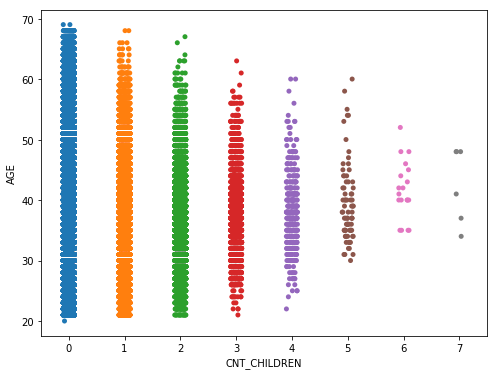

In [28]:
plt.figure(figsize=(8,6))

sns.stripplot(x=app_df2['CNT_CHILDREN'],y=app_df2['AGE'])

plt.show()

As we can see the above plot, the outliers have been removed from the column CNT_CHILDREN

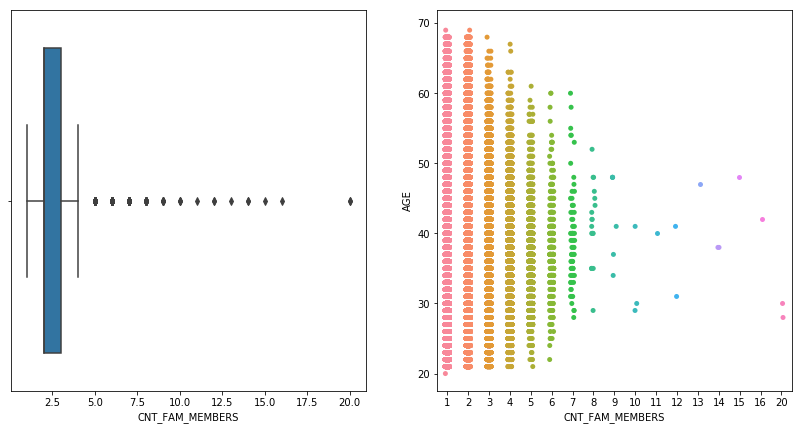

In [29]:
#Lets plot a box plot and scatter plot for the column CNT_FAM_MEMBERS
plt.figure(figsize=(14,7))

plt.subplot(121)
sns.boxplot(x=app_df1['CNT_FAM_MEMBERS'])

plt.subplot(122)
sns.stripplot(x=app_df1['CNT_FAM_MEMBERS'],y=app_df1['AGE'])


plt.show()

From the above Box plot and scatter plot we can observe that there are some values for count of family members present between 11 and 20 which is very unlikely for a person who is aged below 40. Also these could affect our analysis as these are very far from the median value. Lets consider these as Outliers and remove those.

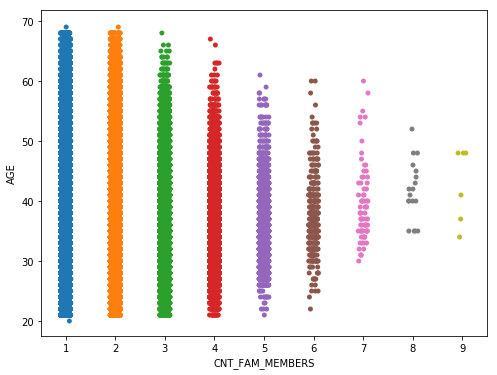

In [30]:
#Removing outliers from the column CNT_FAM_MEMBERS

app_df2 = app_df2.drop(app_df2[(app_df2['AGE'] < 40) & (app_df2['CNT_FAM_MEMBERS'] > 10)].index)

plt.figure(figsize=(8,6))

sns.stripplot(x=app_df2['CNT_FAM_MEMBERS'],y=app_df2['AGE'])

plt.show()

### Binning of Continuous variables

Lets concider the following columns for binning.

1. AGE
2. AMT_INCOME_TOTAL
3. YEARS_EMP

In [31]:
#Creating Bin for Age Group

bins = [20,30,50,60]
slot = ['20-30y','30-50y','50y & above']
app_df2['AGE_GROUP'] = pd.cut(app_df2['AGE'],bins,labels=slot)

app_df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,OCCUPATION_TYPE,ORGANIZATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE,YEARS_EMP,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,0,1,Laborers,Business Entity Type 3,2,2,25,1,20-30y
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765,1188,0,2,Core staff,School,0,0,45,3,30-50y
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,1,1,Laborers,Government,0,0,52,0,50y & above
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,0,2,Laborers,Business Entity Type 3,0,0,52,8,50y & above
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,0,1,Core staff,Religion,0,0,54,8,50y & above


In [32]:
#Creating Bins for range of annual income.

bins = [0,50000,100000,500000,1000000]
slot = ['0-50000', '50000-100000','100000-500000','500000 & above']
app_df2['ANNUAL_INCOME_RANGE'] = pd.cut(app_df2['AMT_INCOME_TOTAL'], bins, labels=slot)

app_df2.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,OCCUPATION_TYPE,ORGANIZATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE,YEARS_EMP,AGE_GROUP,ANNUAL_INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,0,1,Laborers,Business Entity Type 3,2,2,25,1,20-30y,100000-500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765,1188,0,2,Core staff,School,0,0,45,3,30-50y,100000-500000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,1,1,Laborers,Government,0,0,52,0,50y & above,50000-100000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,0,2,Laborers,Business Entity Type 3,0,0,52,8,50y & above,100000-500000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,0,1,Core staff,Religion,0,0,54,8,50y & above,100000-500000


In [33]:
#Creating bin for total years of employment

bins = [-1,0,5,10,20,30]
slot = ['0-1y','1-5y','5-10y','10-20y','20y & above']
app_df2['EMPLOYMENT_GROUP'] = pd.cut(app_df2['YEARS_EMP'],bins,labels=slot)

app_df2.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,OCCUPATION_TYPE,ORGANIZATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE,YEARS_EMP,AGE_GROUP,ANNUAL_INCOME_RANGE,EMPLOYMENT_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,0,1,Laborers,Business Entity Type 3,2,2,25,1,20-30y,100000-500000,1-5y
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765,1188,0,2,Core staff,School,0,0,45,3,30-50y,100000-500000,1-5y
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,1,1,Laborers,Government,0,0,52,0,50y & above,50000-100000,0-1y
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,0,2,Laborers,Business Entity Type 3,0,0,52,8,50y & above,100000-500000,5-10y
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,0,1,Core staff,Religion,0,0,54,8,50y & above,100000-500000,5-10y


### Calculating the data imbalance 

Lets compare the data in the 'TARGET' column for data imbalance. 
Value '1' represents payment difficulty and value '0' represents all other cases.

Imbalance(%) = (no. of rows with class 1/ no. of rows with class 0)*100


In [34]:
cnt_cls1 = len(app_df2[app_df2['TARGET'] == '1' ])

cnt_cls0 = len(app_df2[app_df2['TARGET'] == '0' ])

imb_perc = print((cnt_cls1/cnt_cls0)*100)

#len(df[df['education'] == '9th'])

9.479557939075493


The imbalance percentage of people with payment difficulty to all other applicaants is approximately 9.48%

### Lets divide the dataframe into two dataframes according to the 'TARGET' column i.e the applicants with payment difficulties (class 1) and all others (class 0)

In [35]:
cls1_df = app_df2[app_df2['TARGET']=='1']

cls1_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,OCCUPATION_TYPE,ORGANIZATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE,YEARS_EMP,AGE_GROUP,ANNUAL_INCOME_RANGE,EMPLOYMENT_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,0,1,Laborers,Business Entity Type 3,2,2,25,1,20-30y,100000-500000,1-5y
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,18724,2628,0,1,Cooking staff,Business Entity Type 3,1,0,51,7,50y & above,100000-500000,5-10y
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,17482,1262,0,2,Laborers,Business Entity Type 3,0,0,47,3,30-50y,100000-500000,1-5y
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,13384,3597,1,2,Sales staff,Self-employed,0,0,36,9,30-50y,100000-500000,5-10y
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Commercial associate,Incomplete higher,Single / not married,With parents,10199,2015,0,1,NaN,Industry: type 4,0,0,27,5,20-30y,100000-500000,1-5y


In [36]:
cls0_df = app_df2[app_df2['TARGET']=='0']

cls0_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,OCCUPATION_TYPE,ORGANIZATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE,YEARS_EMP,AGE_GROUP,ANNUAL_INCOME_RANGE,EMPLOYMENT_GROUP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765,1188,0,2,Core staff,School,0,0,45,3,30-50y,100000-500000,1-5y
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,1,1,Laborers,Government,0,0,52,0,50y & above,50000-100000,0-1y
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,0,2,Laborers,Business Entity Type 3,0,0,52,8,50y & above,100000-500000,5-10y
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,0,1,Core staff,Religion,0,0,54,8,50y & above,100000-500000,5-10y
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,16941,1588,1,2,Laborers,Other,0,0,46,4,30-50y,50000-100000,1-5y


### Univariate Analysis for Categorical Variables

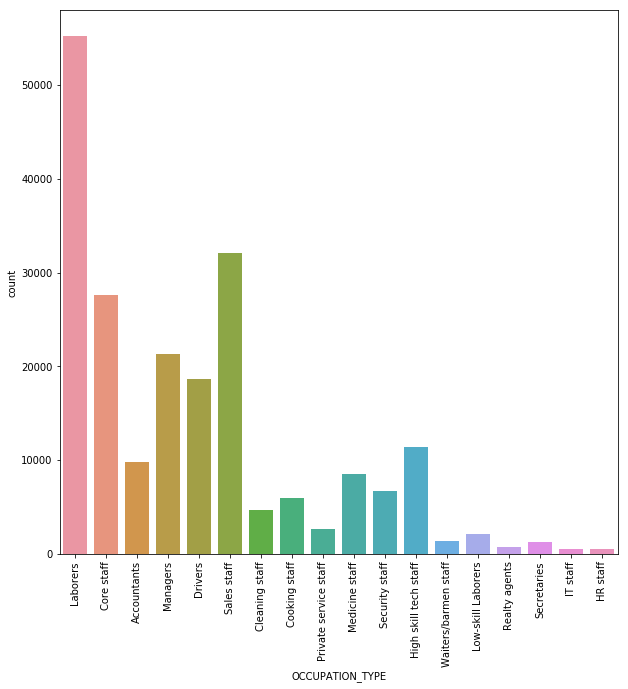

In [37]:
#Plotting a count plot of occupation type.

plt.figure(figsize=(10,10))
sns.countplot(x="OCCUPATION_TYPE", data=app_df)
plt.xticks(rotation =90)
plt.show()

### Insight:

The top 3 occupation types who apply for the loan are.

1. Laborers
2. Sales Staff
3. Core Staff

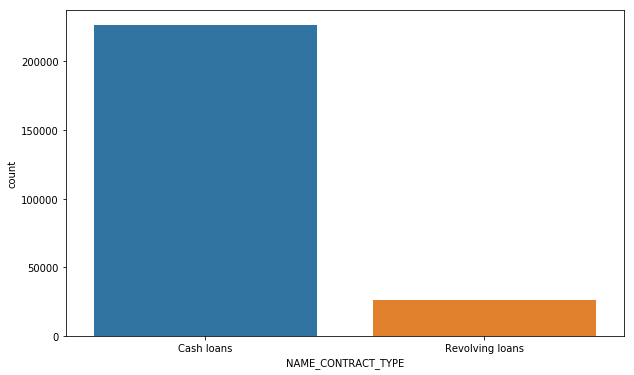

In [38]:
#Review the NAME_CONTRACT_TYPE column for class 1 & class 0.

plt.figure(figsize=(10,6))

sns.countplot(x = 'NAME_CONTRACT_TYPE', data = app_df2)


plt.show()



### Insight:

Form the above plot we can see that no. of Cash loan is very high comparing to the no. of Revolving loans for both targets. It implys that people prefer cash loan like Personal loan than Revolving loans like Credit cards. Here the reason could be the intrest rate and low emi per month. Since a person has to make a bulk payment at a time if he/she uses credit card they prefer cash loans over it.

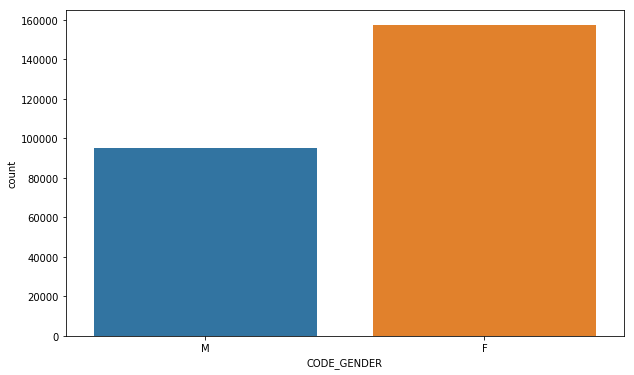

In [39]:
#Review the CODE_GENDER column for class 1 & class 0.


plt.figure(figsize=(10,6))

#plt.subplot(121)
sns.countplot(x = 'CODE_GENDER', data = app_df2)
#plt.title('Applicants with payment difficulties')

#plt.subplot(122)
#sns.countplot(x = 'CODE_GENDER', data = cls0_df)
#plt.title('All other applicants')

plt.show()



### Insight:

From the above plot we can see that Females are applying loan more than Males.

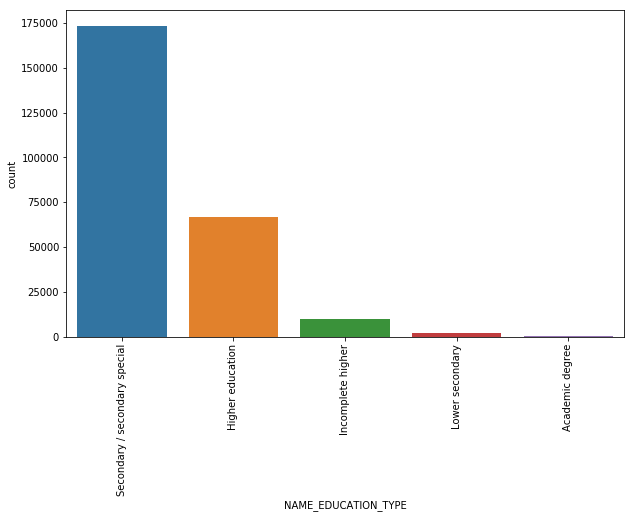

In [40]:
#Review the column NAME_EDUCATION_TYPE

plt.figure(figsize=(10,6))

sns.countplot(x = 'NAME_EDUCATION_TYPE', data = app_df2)
plt.xticks(rotation =90)


plt.show()

From the above plot we can see that people with Secondary education apply the most for a loan while people having an Academic degree are the least in applying for a loan

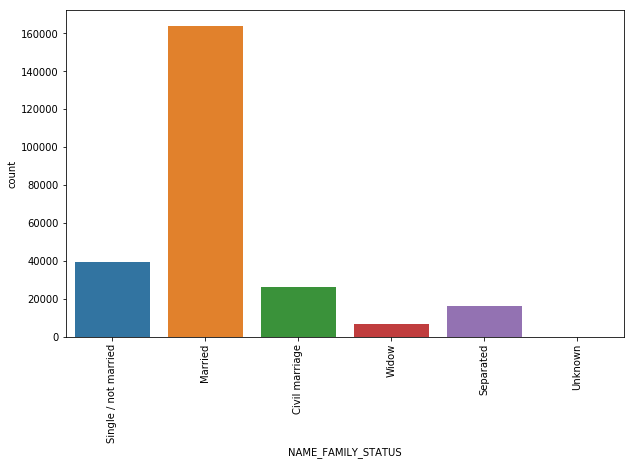

In [41]:
#Review the column NAME_FAMILY_STATUS

plt.figure(figsize=(10,6))

sns.countplot(x = 'NAME_FAMILY_STATUS', data = app_df2)

plt.xticks(rotation =90)



plt.show()

### Insight:
From above plot we can see that the most no. of loans are applied by Married people and the least by Widows.

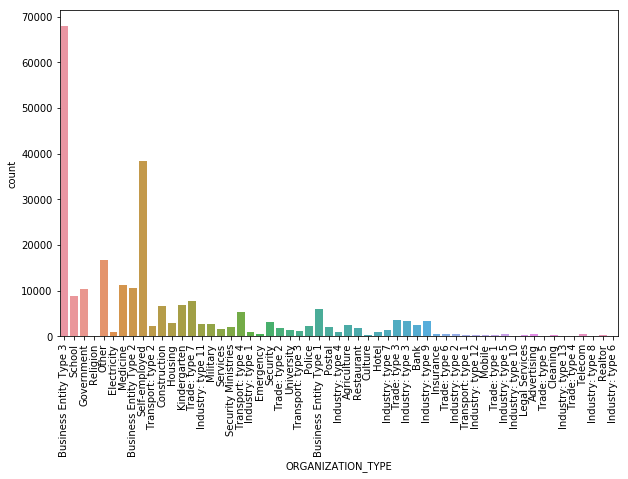

In [42]:
#Reviewing ORGANIZATION_TYPE column.

plt.figure(figsize=(10,6))

sns.countplot(x = 'ORGANIZATION_TYPE', data = app_df2)

plt.xticks(rotation =90)


plt.show()


### Insight:
The above plot shows that people from organization 'Business Entity Type3' are the most who opt for a loan. Surprizingly no. of loan applications from organization type 'Industry' is very less. 

### Univariate Analysis for Numerical Variables

In [43]:
app_df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,OCCUPATION_TYPE,ORGANIZATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE,YEARS_EMP,AGE_GROUP,ANNUAL_INCOME_RANGE,EMPLOYMENT_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,0,1,Laborers,Business Entity Type 3,2,2,25,1,20-30y,100000-500000,1-5y
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765,1188,0,2,Core staff,School,0,0,45,3,30-50y,100000-500000,1-5y
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,1,1,Laborers,Government,0,0,52,0,50y & above,50000-100000,0-1y
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,0,2,Laborers,Business Entity Type 3,0,0,52,8,50y & above,100000-500000,5-10y
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,0,1,Core staff,Religion,0,0,54,8,50y & above,100000-500000,5-10y


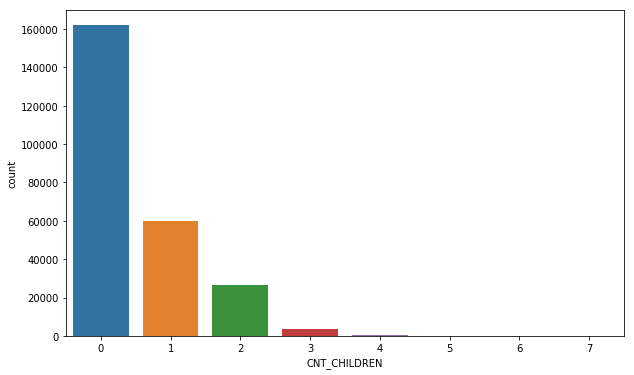

In [44]:
#Reviewing CNT_CHILDREN column.

plt.figure(figsize=(10,6))

sns.countplot(x = 'CNT_CHILDREN', data = app_df2)

plt.show()

### Insight:
We can see that people with no children are more likely to apply for loans. It is surprising since with children the expenses more likely to increase. It proves that no. of children has nothing to do with the requirement of a loan.

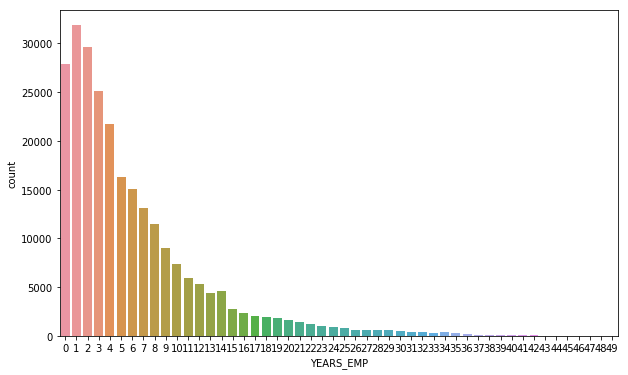

In [45]:
#Reviewing YEARS_EMP column.

plt.figure(figsize=(10,6))

sns.countplot(x = 'YEARS_EMP', data = app_df2)

plt.show()

### Insight:
This is interesting. As the no. of years of employment increases the requirement of a loan decreases. People having work experience of 0-2 years are more likely to apply for a loan. 

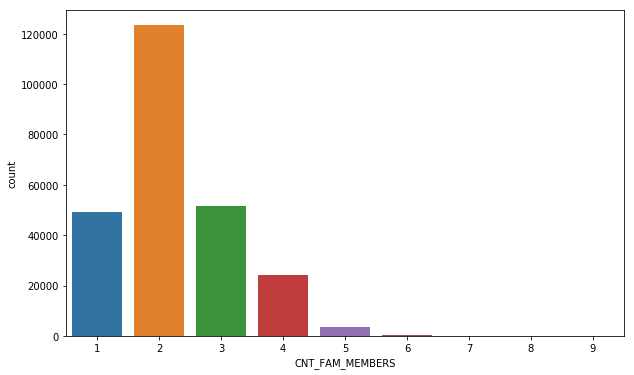

In [ ]:
#Reviewing CNT_FAM_MEMBERS column.

plt.figure(figsize=(10,6))

sns.countplot(x = 'CNT_FAM_MEMBERS', data = app_df2)

plt.show()

### Insight:
The above plot reveals that the people having a family of 2 are most likely to apply for loans but as the number increases from 2 the requirement of a loan also decreases.

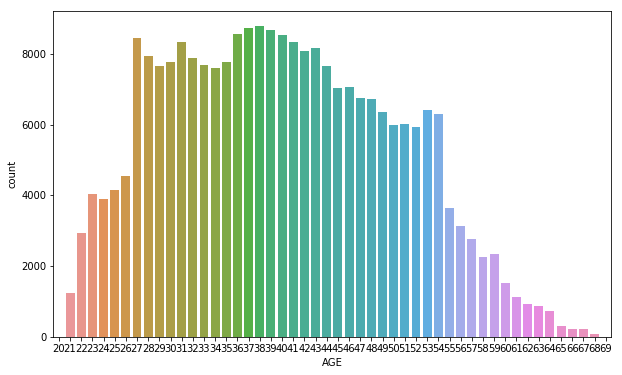

In [ ]:
#Reviewing AGE column.

plt.figure(figsize=(10,6))

sns.countplot(x = 'AGE', data = app_df2)

plt.show()

### Insight:

If we plot the age of the applicants, we see that between age 27-43 most no. of people apply for a loan. This is the age people start getting married and grow their family. May be that is a factor. But overall the age criteria do not matter.

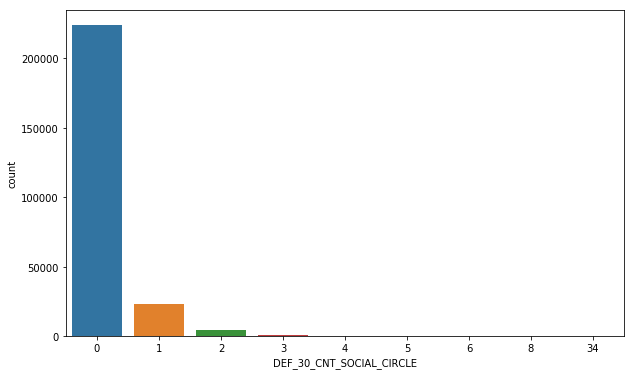

In [ ]:
#Reviewing DEF_30_CNT_SOCIAL_CIRCLE column.

plt.figure(figsize=(10,6))

sns.countplot(x = 'DEF_30_CNT_SOCIAL_CIRCLE', data = app_df2)

plt.show()

### Insight:
The above plot shows that most people who apply for a loan do not have people in their social circle who fall in last 30 DPD category. So it is a good thing for a bank and banks do not have to worry about the kind of social circle the loan applicant has.

### Correlation Matrix : All Continuos(Numeric) Variables

In [ ]:
app_df_corr = app_df2.corr()

app_df_corr

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE,YEARS_EMP
SK_ID_CURR,1.000000,-0.001169,-0.002342,-0.000582,-0.001580,-0.000197,0.001465,0.000105,-0.000103,-0.001786,0.001878,0.002398,0.001388,-0.000038
CNT_CHILDREN,-0.001169,1.000000,-0.003500,-0.017466,-0.005789,-0.021286,-0.237980,-0.061380,-0.001264,0.892372,0.003119,0.001594,-0.237947,-0.061254
AMT_INCOME_TOTAL,-0.002342,-0.003500,1.000000,0.143089,0.175375,0.145942,0.021060,0.013001,-0.033468,-0.000196,-0.013384,-0.012972,0.021083,0.012914
AMT_CREDIT,-0.000582,-0.017466,0.143089,1.000000,0.761298,0.986453,0.157371,0.091303,-0.040919,0.037876,-0.023876,-0.025999,0.157297,0.091150
AMT_ANNUITY,-0.001580,-0.005789,0.175375,0.761298,1.000000,0.765734,0.092506,0.053611,-0.055064,0.042625,-0.023526,-0.024576,0.092432,0.053173
AMT_GOODS_PRICE,-0.000197,-0.021286,0.145942,0.986453,0.765734,1.000000,0.152187,0.093382,-0.015425,0.035906,-0.025064,-0.026705,0.152116,0.093222
DAYS_BIRTH,0.001465,-0.237980,0.021060,0.157371,0.092506,0.152187,1.000000,0.352318,-0.037174,-0.172072,-0.016970,-0.017585,0.999591,0.351790
DAYS_EMPLOYED,0.000105,-0.061380,0.013001,0.091303,0.053611,0.093382,0.352318,1.000000,0.011244,-0.028861,-0.009456,-0.011057,0.352107,0.999016
FLAG_WORK_PHONE,-0.000103,-0.001264,-0.033468,-0.040919,-0.055064,-0.015425,-0.037174,0.011244,1.000000,0.013308,-0.004336,-0.004448,-0.037207,0.011220
CNT_FAM_MEMBERS,-0.001786,0.892372,-0.000196,0.037876,0.042625,0.035906,-0.172072,-0.028861,0.013308,1.000000,0.002030,-0.000896,-0.172109,-0.028798


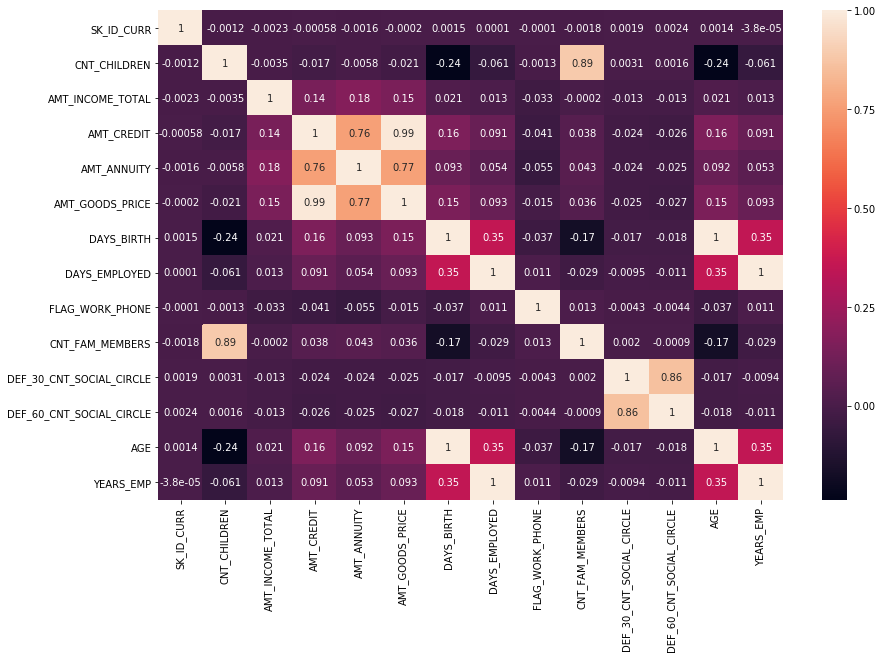

In [ ]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(app_df_corr, 
            xticklabels=app_df_corr.columns.values,
            yticklabels=app_df_corr.columns.values,annot= True)
plt.show()

### Insight:

From the above correlation plot we find the following columns are closely co-related.

1. CNT_FAM_MEMBERS & CNT_CHILDREN
2. AMT_GOODS_PRICE & AMT_ANNUITY
3. AMT_ANNUITY & AMT_CREDIT
4. DEF_30_CNT_SOCIAL_CIRCLE & DEF_60_CNT_SOCIAL_CIRCLE

We wil consider the columns to analyze these.

### Bivariate Analysis. 

In [ ]:
cls0_df.shape

(230285, 28)

In [ ]:
# Removing random records from the dataframe since I am not able to perform analysis on such a large dataset
# on my laptop. 

np.random.seed(10)

remove_n = 200000
drop_indices = np.random.choice(cls0_df.index, remove_n, replace=False)
cls0_subset = cls0_df.drop(drop_indices)

cls0_subset.shape



(30285, 28)

In [ ]:
app_df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,OCCUPATION_TYPE,ORGANIZATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE,YEARS_EMP,AGE_GROUP,ANNUAL_INCOME_RANGE,EMPLOYMENT_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,0,1,Laborers,Business Entity Type 3,2,2,25,1,20-30y,100000-500000,1-5y
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765,1188,0,2,Core staff,School,0,0,45,3,30-50y,100000-500000,1-5y
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,1,1,Laborers,Government,0,0,52,0,50y & above,50000-100000,0-1y
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,0,2,Laborers,Business Entity Type 3,0,0,52,8,50y & above,100000-500000,5-10y
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,0,1,Core staff,Religion,0,0,54,8,50y & above,100000-500000,5-10y


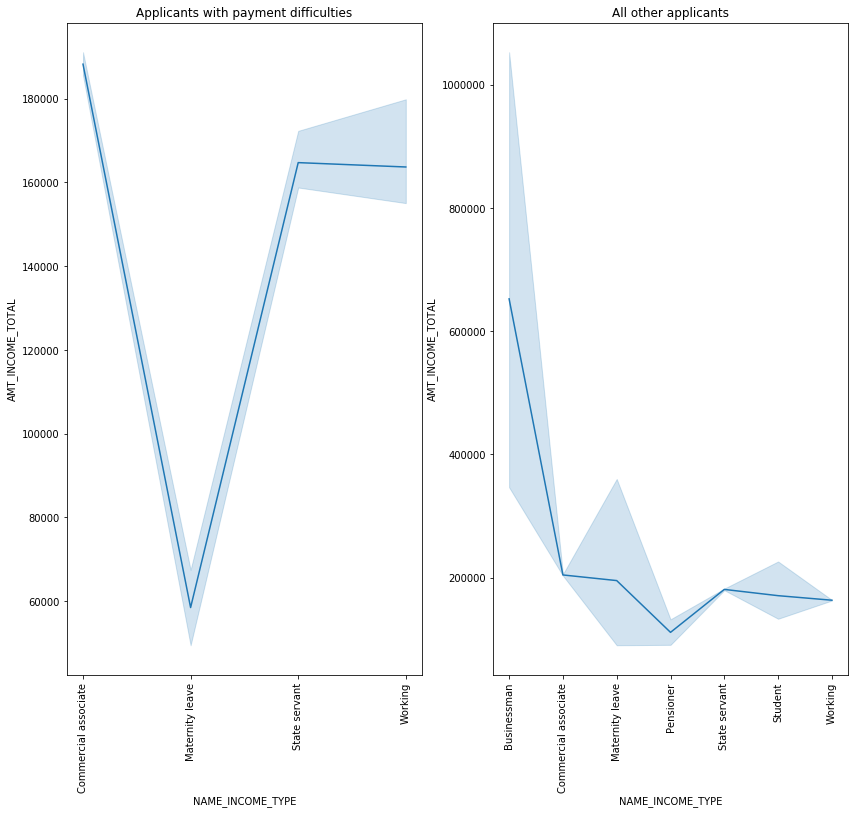

In [ ]:
#Review AMT_CREDIT vs NAME_CONTRACT_TYPE


plt.figure(figsize=(14,12))

plt.subplot(121)

sns.lineplot(x = 'NAME_INCOME_TYPE',y = 'AMT_INCOME_TOTAL',data = cls1_df)
plt.title('Applicants with payment difficulties')
plt.xticks(rotation=90)

plt.subplot(122)
sns.lineplot(x = 'NAME_INCOME_TYPE',y = 'AMT_INCOME_TOTAL',data = cls0_df)
plt.title('All other applicants')
plt.xticks(rotation=90)


plt.show()

### Insight:
From above graph we can see that State servants and working professionals with income from 16000-18000 are the ones who face difficulty while loan repayment. While businessmen earn the most among all catagories who avail a loan.

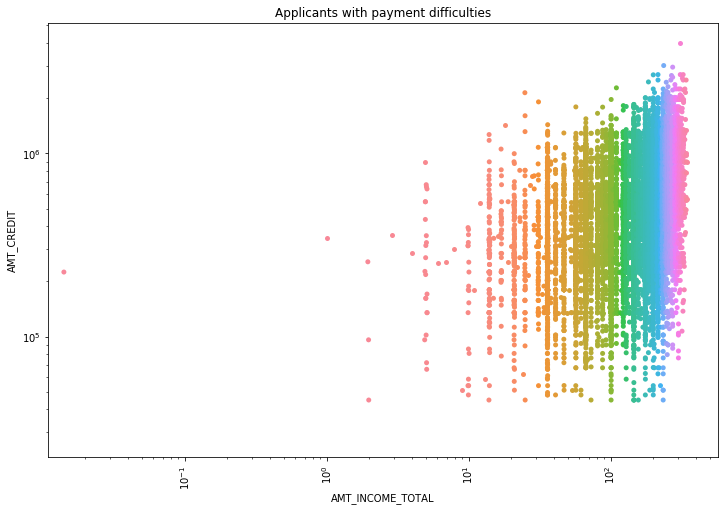

In [ ]:
#Review ANNUAL_INCOME_RANGE vs AMT_CREDIT


plt.figure(figsize=(12,8))

#plt.subplot(121)

sns.stripplot(x = 'AMT_INCOME_TOTAL',y = 'AMT_CREDIT',data = cls1_df)
plt.title('Applicants with payment difficulties')
plt.xticks(rotation=90)
plt.xscale('log')
plt.yscale('log')


#plt.subplot(122)
#sns.lmplot(x = 'AMT_INCOME_TOTAL',y = 'AMT_CREDIT',data = cls0_df)
#plt.title('All other applicants')
#plt.xticks(rotation=90)



plt.show()

### Insight:
As the income increases the credit given by bank also increases. We see that people with income 500000 are the ones who face the difficulty while repaying the bank.

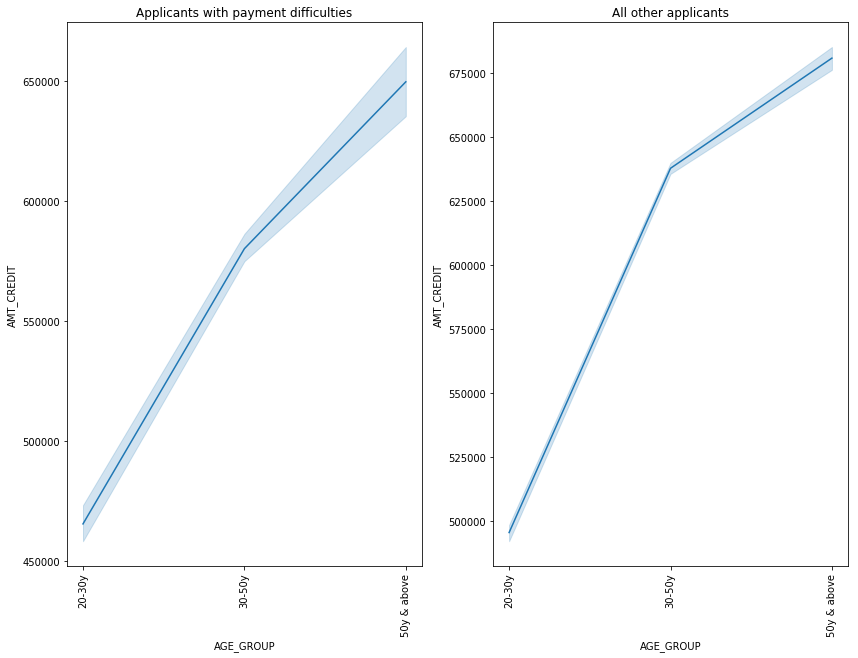

In [ ]:
#Review AMT_CREDIT vs AGE_GROUP


plt.figure(figsize=(14,10))

plt.subplot(121)

sns.lineplot(x = 'AGE_GROUP',y = 'AMT_CREDIT',data = cls1_df)
plt.title('Applicants with payment difficulties')
plt.xticks(rotation=90)

plt.subplot(122)
sns.lineplot(x = 'AGE_GROUP',y = 'AMT_CREDIT',data = cls0_df)
plt.title('All other applicants')
plt.xticks(rotation=90)


plt.show()

### Insight:

The people with age 50 and above are the ones who face difficulty while repaying the loan. Same group gets higher amount of loan than the other age groups.

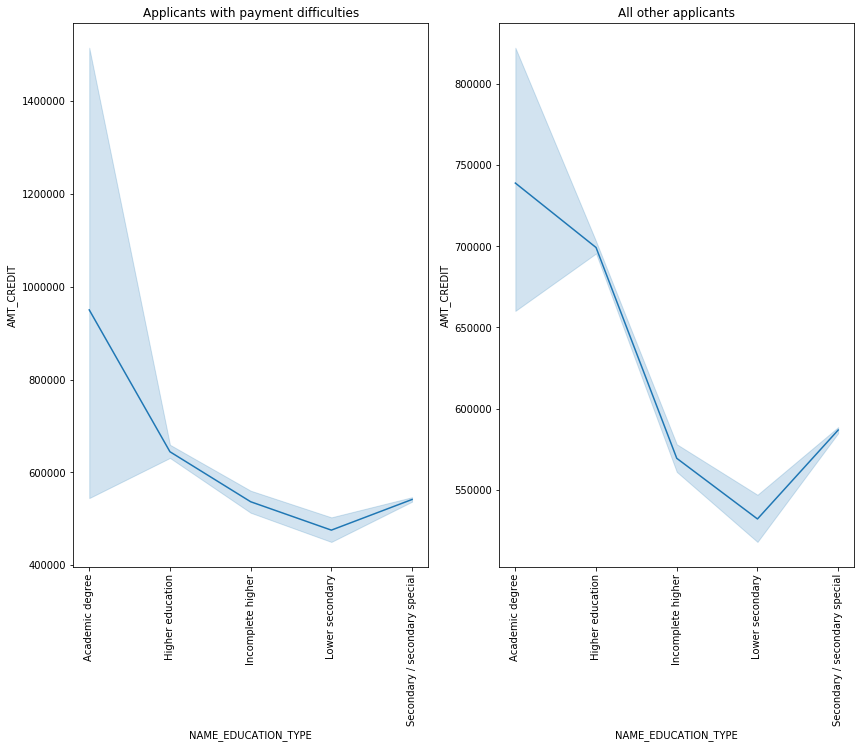

In [ ]:
#Review NAME_EDUCATION_TYPE vs AMT_INCOME_TOTAL


plt.figure(figsize=(14,10))

plt.subplot(121)

sns.lineplot(x = 'NAME_EDUCATION_TYPE',y = 'AMT_CREDIT',data = cls1_df)
plt.title('Applicants with payment difficulties')
plt.xticks(rotation=90)

plt.subplot(122)
sns.lineplot(x = 'NAME_EDUCATION_TYPE',y = 'AMT_CREDIT',data = cls0_df)
plt.title('All other applicants')
plt.xticks(rotation=90)


plt.show()

### Insight:

People with higher education and above get a higher amount of loan than the others.

They are also the ones who face difficulty while repayment.

People with highest qualification as Lower secondary are given the lowest amount as loan. It proves banks consider the highest qualification of the applicant as a factor while decidint the credit amount.

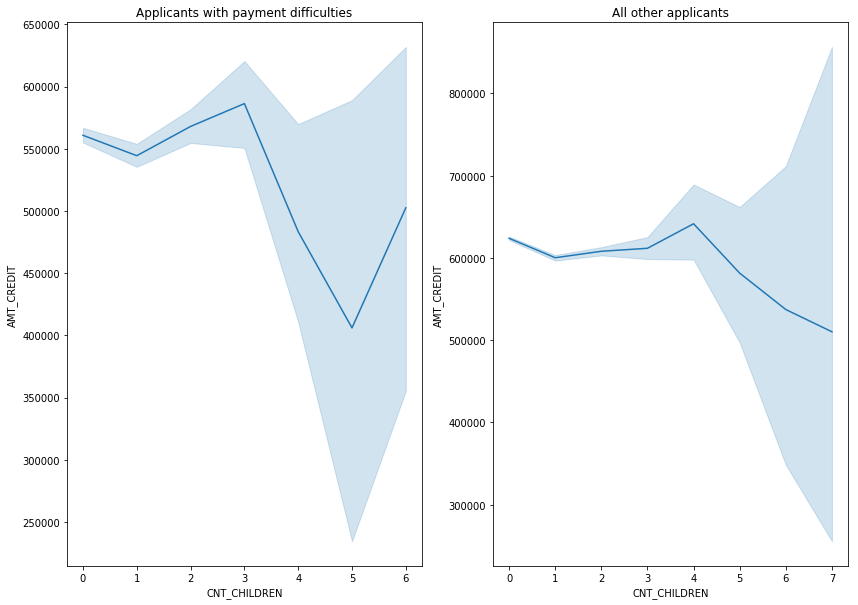

In [ ]:
#Review CNT_CHILDREN vs AMT_CREDIT


plt.figure(figsize=(14,10))

plt.subplot(121)

sns.lineplot(x = 'CNT_CHILDREN',y = 'AMT_CREDIT',data = cls1_df)
plt.title('Applicants with payment difficulties')

plt.subplot(122)
sns.lineplot(x = 'CNT_CHILDREN',y = 'AMT_CREDIT',data = cls0_df)
plt.title('All other applicants')


plt.show()

### Insight:

From the above plot we can see that with the increase in no. of children the difficulty to repay a loan increases. Hence the banks provide lower amount of loan to the people having more children.

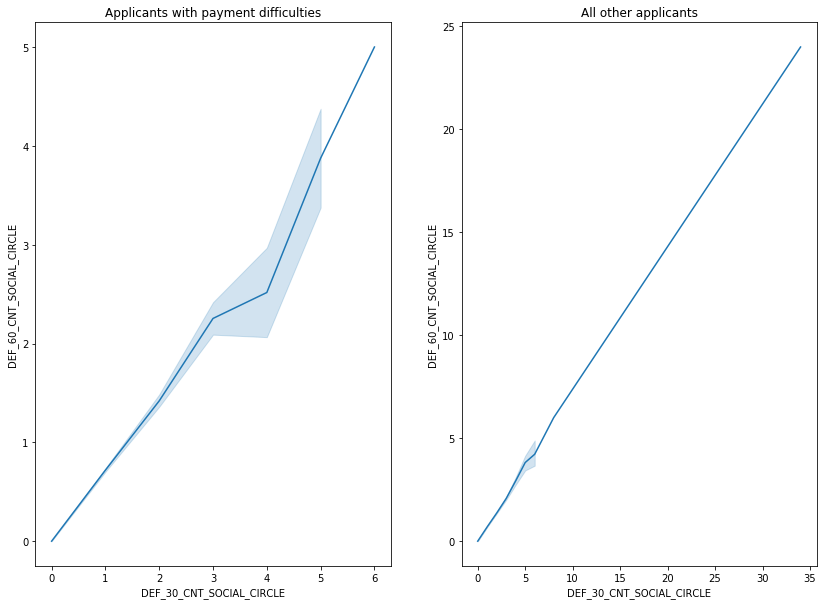

In [ ]:
# Reviewing DEF_30_CNT_SOCIAL_CIRCLE & DEF_60_CNT_SOCIAL_CIRCLE

plt.figure(figsize=(14,10))

plt.subplot(121)

sns.lineplot(x = 'DEF_30_CNT_SOCIAL_CIRCLE',y = 'DEF_60_CNT_SOCIAL_CIRCLE',data = cls1_df)
plt.title('Applicants with payment difficulties')

plt.subplot(122)
sns.lineplot(x = 'DEF_30_CNT_SOCIAL_CIRCLE',y = 'DEF_60_CNT_SOCIAL_CIRCLE',data = cls0_df)
plt.title('All other applicants')


plt.show()

### Insight:

1. We find that when a person has more than 3 people in his/her social circle with 30 DPD, the same is most likely to fall in 60 DPD as well. SO lets check if banks consider this criteria for deciding credit amount in the next plot.

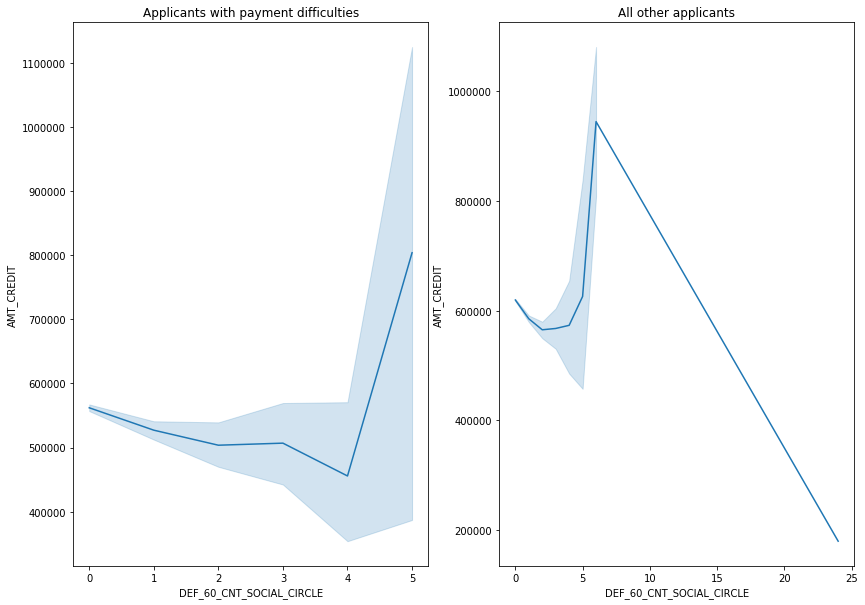

In [ ]:
# Reviewing DEF_30_CNT_SOCIAL_CIRCLE & DEF_60_CNT_SOCIAL_CIRCLE

plt.figure(figsize=(14,10))

plt.subplot(121)

sns.lineplot(x = 'DEF_60_CNT_SOCIAL_CIRCLE',y = 'AMT_CREDIT',data = cls1_df)
plt.title('Applicants with payment difficulties')

plt.subplot(122)
sns.lineplot(x = 'DEF_60_CNT_SOCIAL_CIRCLE',y = 'AMT_CREDIT',data = cls0_df)
plt.title('All other applicants')


plt.show()

### Insight:

The plot above proves our insight from the previous plot. As the no. of defaulters id 60 DPD in an applicant's social circle goes past 3 the bank approves a less amount. We see one instance where the social circle 60 DPD value is 5 but the bank has approved 800000 lon. That is an outlier in this instance.

In [ ]:
# Reviewing AMT_ANNUITY & AMT_CREDIT

plt.figure(figsize=(14,10))

plt.subplot(121)

sns.lineplot(x = 'AMT_ANNUITY',y = 'AMT_CREDIT',data = cls1_df)
plt.title('Applicants with payment difficulties')

plt.subplot(122)
sns.lineplot(x = 'AMT_ANNUITY',y = 'AMT_CREDIT',data = cls0_df)
plt.title('All other applicants')


plt.show()

###  Insight :

In both the cases Amount of annuity is directly proportional with the Credit amount.
Annuity amount plays a part while banks deciding the credit amount.